### Initial setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/gdp_by_country_1999_2022.csv', sep=',', header=0, thousands=",") # read the dataset from the CSV file
df_no_index = df.copy() # make a copy of the dataframe with no index
df.set_index('Country', inplace=True)


### Data transformation & Data analysis

#### Add a 'Continent' column to the dataframe, for analysis purposes

In [2]:
continent_countries = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Democratic Republic of', 'Congo, Republic of', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Swaziland', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Côte d\'Ivoire', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Kyrgyz Republic', 'Hong Kong SAR', 'Afghanistan, Rep. of.', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lao People\'s Democratic Republic', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Korea', 'Sri Lanka', 'Syrian Arab Republic', 'Taiwan Province of China', 'Tajikistan', 'Thailand', 'Timor-Leste, Dem. Rep. of', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen, Republic of'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Macedonia, Former Yugoslav Republic of', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas, The', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

def get_continent(country):
    for continent, countries in continent_countries.items():
        if country in countries:
            return continent
    return 'Unknown'

df_cont = df.copy()
df_cont['Continent'] = df.index.map(get_continent)

print(df_cont.head().to_string())

                         1999    2000    2001    2002    2003    2004     2005     2006     2007     2008     2009     2010     2012     2013     2014     2015     2016     2017     2018     2019     2020     2021     2022      Continent
Country                                                                                                                                                                                                                                      
Afghanistan, Rep. of.   0.000   0.000   0.000   4.084   4.585   5.971    7.309    8.399    9.892   11.513   13.318   15.406   19.248   21.555   24.304    0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000           Asia
Albania                 3.444   3.695   4.096   4.456   5.600   7.452    8.376    9.133   10.163   11.131   11.726   11.797   13.808   14.910   16.053   11.591   12.204   13.214   14.341   15.553   16.996   16.770   18.012         Europe
Algeria                48.845  54.749  55.181  5

#### Visualise the structure of the dataframe

In [3]:
print(df.head().to_string(line_width=1000))

                         1999    2000    2001    2002    2003    2004     2005     2006     2007     2008     2009     2010     2012     2013     2014     2015     2016     2017     2018     2019     2020     2021     2022
Country                                                                                                                                                                                                                       
Afghanistan, Rep. of.   0.000   0.000   0.000   4.084   4.585   5.971    7.309    8.399    9.892   11.513   13.318   15.406   19.248   21.555   24.304    0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000
Albania                 3.444   3.695   4.096   4.456   5.600   7.452    8.376    9.133   10.163   11.131   11.726   11.797   13.808   14.910   16.053   11.591   12.204   13.214   14.341   15.553   16.996   16.770   18.012
Algeria                48.845  54.749  55.181  57.053  68.013  85.016  102.380  114.322  116.158  126.889  1

#### Describe the numerical contents of the dataframe

In [4]:
print(df.describe().to_string(line_width=1000))

              1999         2000          2001          2002          2003          2004          2005          2006          2007          2008          2009          2010          2012          2013          2014          2015          2016          2017          2018          2019          2020          2021          2022
count   180.000000   180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000
mean    171.770611   176.560339    175.371694    182.479317    204.966144    230.450128    248.573867    267.829694    286.582256    304.212356    317.417494    335.458594    370.459183    391.113289    413.727172    402.579306    416.266039    439.991744    465.477400    493.288628    523.746856    516.611517    556.795356
std     799.068940   8

#### Relevant analysis: Mean GDP evolution over the years

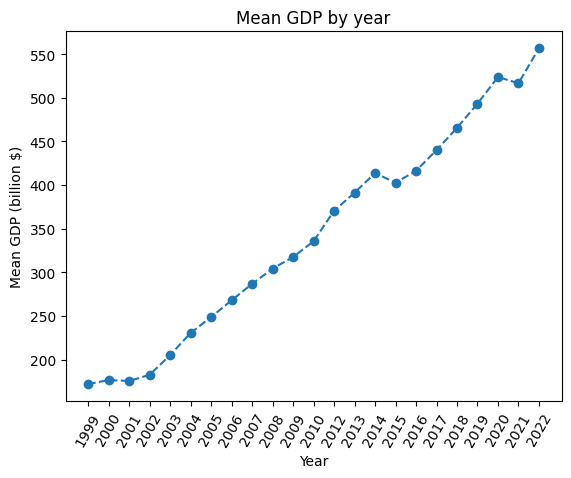

In [5]:
mean = df.mean()
plt.plot(mean, marker='o', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Mean GDP (billion $)')
plt.title('Mean GDP by year')
plt.xticks(rotation=60)
plt.show()

#### Relevant analysis: Mean GDP evolution over the years for each continent

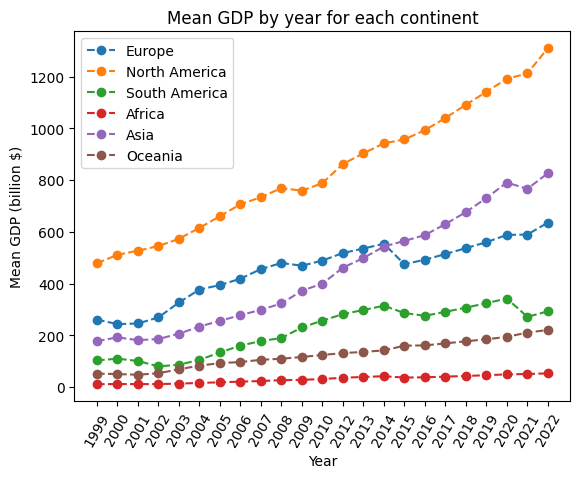

In [6]:
europe_gdp = df_cont[df_cont['Continent'] == 'Europe'].select_dtypes(include=[np.number]) # exclude the 'Continent' column from the selection
na_gdp = df_cont[df_cont['Continent'] == 'North America'].select_dtypes(include=[np.number])
sa_gdp = df_cont[df_cont['Continent'] == 'South America'].select_dtypes(include=[np.number])
africa_gdp = df_cont[df_cont['Continent'] == 'Africa'].select_dtypes(include=[np.number])
asia_gdp = df_cont[df_cont['Continent'] == 'Asia'].select_dtypes(include=[np.number])
oceania_gdp = df_cont[df_cont['Continent'] == 'Oceania'].select_dtypes(include=[np.number])
plt.plot(europe_gdp.mean(), marker='o', linestyle='--', label='Europe')
plt.plot(na_gdp.mean(), marker='o', linestyle='--', label='North America')
plt.plot(sa_gdp.mean(), marker='o', linestyle='--', label='South America')
plt.plot(africa_gdp.mean(), marker='o', linestyle='--', label='Africa')
plt.plot(asia_gdp.mean(), marker='o', linestyle='--', label='Asia')
plt.plot(oceania_gdp.mean(), marker='o', linestyle='--', label='Oceania')
plt.xlabel('Year')
plt.ylabel('Mean GDP (billion $)')
plt.title('Mean GDP by year for each continent')
plt.xticks(rotation=60)
plt.legend()
plt.show()


#### Relevant analysis: Romania's GDP growth compared to other countries

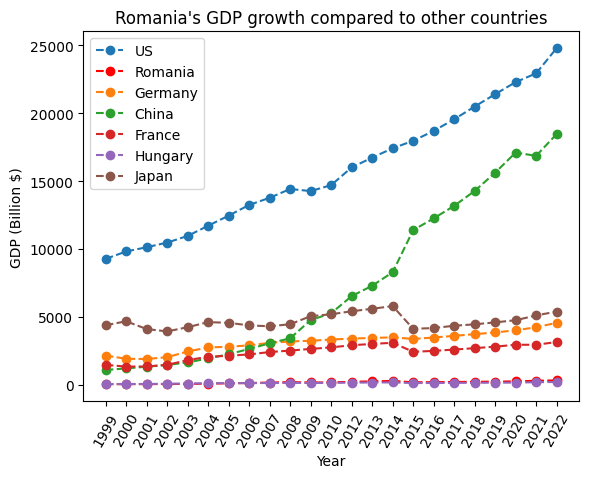

In [7]:
us_gdp = df.loc['United States']
ro_gdp = df.loc['Romania']
ge_gdp = df.loc['Germany']
ch_gdp = df.loc['China']
fr_gdp = df.loc['France']
hu_gdp = df.loc['Hungary']
jp_gdp = df.loc['Japan']
plt.plot(us_gdp, marker='o', linestyle='--', label='US')
plt.plot(ro_gdp, marker='o', linestyle='--', label='Romania', color='r')
plt.plot(ge_gdp, marker='o', linestyle='--', label='Germany')
plt.plot(ch_gdp, marker='o', linestyle='--', label='China')
plt.plot(fr_gdp, marker='o', linestyle='--', label='France')
plt.plot(hu_gdp, marker='o', linestyle='--', label='Hungary')
plt.plot(jp_gdp, marker='o', linestyle='--', label='Japan')
plt.xlabel('Year')
plt.ylabel('GDP (Billion $)')
plt.title('Romania\'s GDP growth compared to other countries')
plt.xticks(rotation=60)
plt.legend()
plt.show()


#### Relevant analysis: Countries with the highest GDP growth

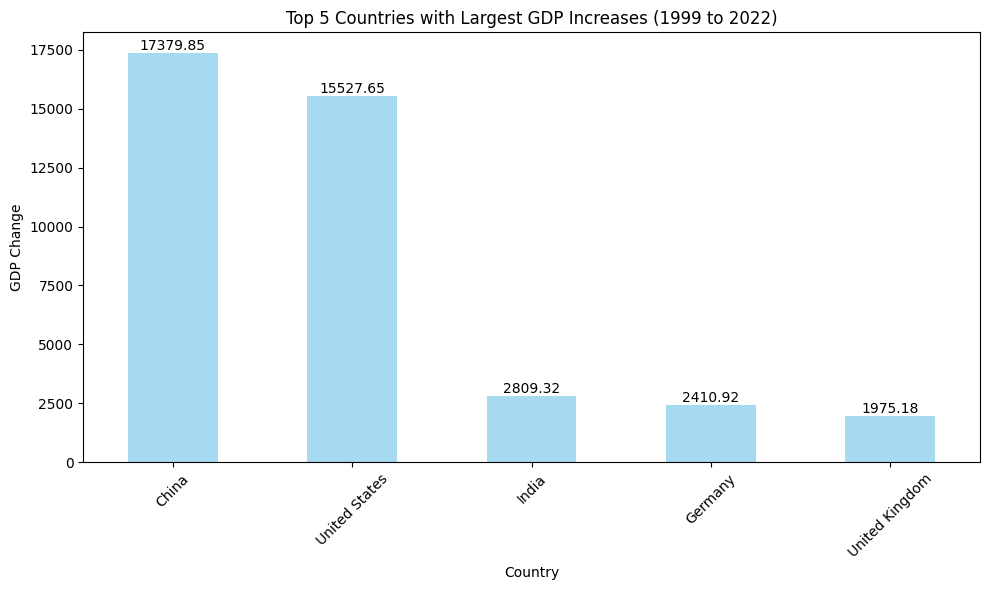

In [8]:
# Calculate the GDP increase for each country
gdp_increase = df['2022'] - df['1999']

# Sort countries based on GDP increase
top_increases = gdp_increase.sort_values(ascending=False).head(5)  # Top 5 countries with largest GDP increases

# Plot the top countries with the largest GDP increases
plt.figure(figsize=(10, 6))
top_increases.plot(kind='bar', color='skyblue', label='Largest GDP Increases', alpha=0.75)
plt.title('Top 5 Countries with Largest GDP Increases (1999 to 2022)')
plt.xlabel('Country')
plt.ylabel('GDP Change')
plt.xticks(rotation=45)
for i in range(len(top_increases)):
    value = top_increases.iloc[i]
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### Relevant analysis: Countries with the biggest GDP decrease

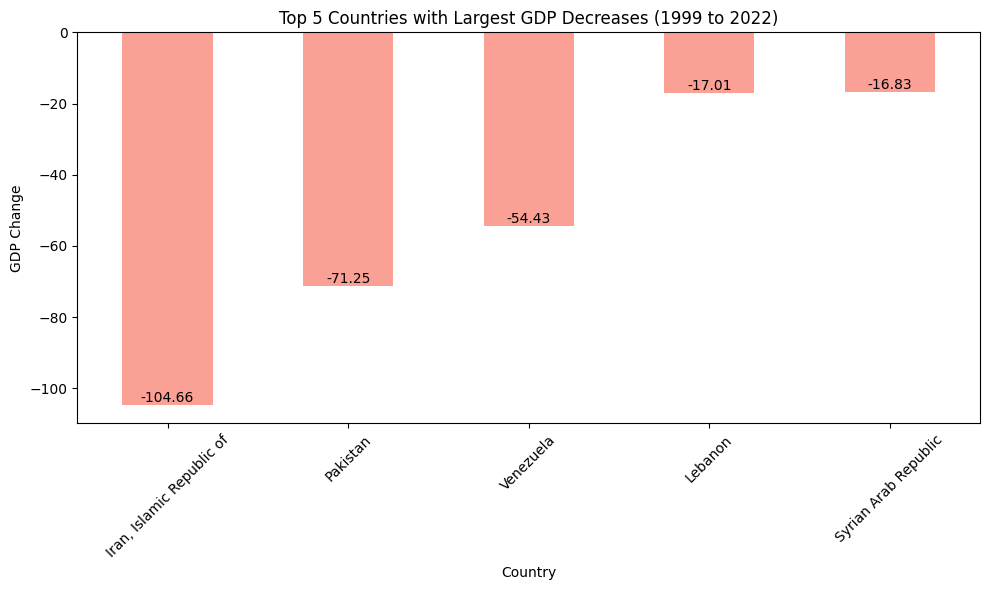

In [9]:
# Calculate the GDP increase for each country
gdp_increase = df['2022'] - df['1999']

# Sort countries based on GDP increase
top_decreases = gdp_increase.sort_values().head(5)  # Top 5 countries with largest GDP decreases

# Plot the top countries with the largest GDP decreases
plt.figure(figsize=(10, 6))
top_decreases.plot(kind='bar', color='salmon', label='Largest GDP Decreases', alpha=0.75)
plt.title('Top 5 Countries with Largest GDP Decreases (1999 to 2022)')
plt.xlabel('Country')
plt.ylabel('GDP Change')
plt.xticks(rotation=45)
for i in range(len(top_decreases)):
    value = top_decreases.iloc[i]
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Applying Linear Regression

#### Predicting the GDP for the year 2023

                 Country    1999    2000    2001    2002    2003    2004     2005     2006     2007     2008     2009     2010     2012     2013     2014     2015     2016     2017     2018     2019     2020     2021     2022  Predicted 2023
0  Afghanistan, Rep. of.   0.000   0.000   0.000   4.084   4.585   5.971    7.309    8.399    9.892   11.513   13.318   15.406   19.248   21.555   24.304    0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000       -3.106514
1                Albania   3.444   3.695   4.096   4.456   5.600   7.452    8.376    9.133   10.163   11.131   11.726   11.797   13.808   14.910   16.053   11.591   12.204   13.214   14.341   15.553   16.996   16.770   18.012       16.125464
2                Algeria  48.845  54.749  55.181  57.053  68.013  85.016  102.380  114.322  116.158  126.889  134.797  154.843  177.830  190.432  203.449  175.077  181.710  192.256  202.179  210.906  219.160  163.812  168.195      176.256011
3                 Angola   6.153

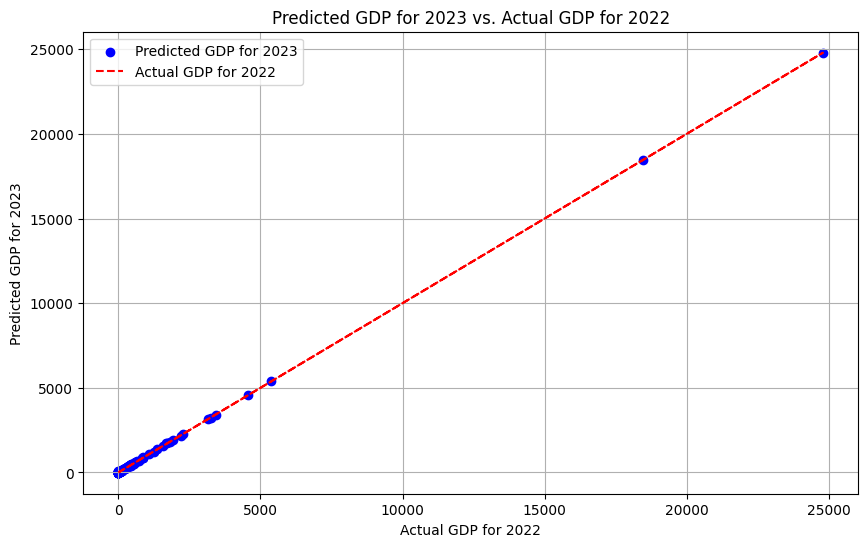

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df2 = df_no_index.copy()

X = df2.drop(columns=['Country', '2022'])
y = df2['2022']

model.fit(X, y)

predictions_2023 = model.predict(X)

df2['Predicted 2023'] = predictions_2023

print(df2.head().to_string(line_width=1000))


plt.figure(figsize=(10, 6))
plt.scatter(df2['2022'], df2['Predicted 2023'], color='blue', label='Predicted GDP for 2023')
plt.plot(df2['2022'], df2['2022'], color='red', linestyle='--', label='Actual GDP for 2022')
plt.title('Predicted GDP for 2023 vs. Actual GDP for 2022')
plt.xlabel('Actual GDP for 2022')
plt.ylabel('Predicted GDP for 2023')
plt.legend()
plt.grid(True)
plt.show()

##### 2022 v. predicted 2023: the biggest differences

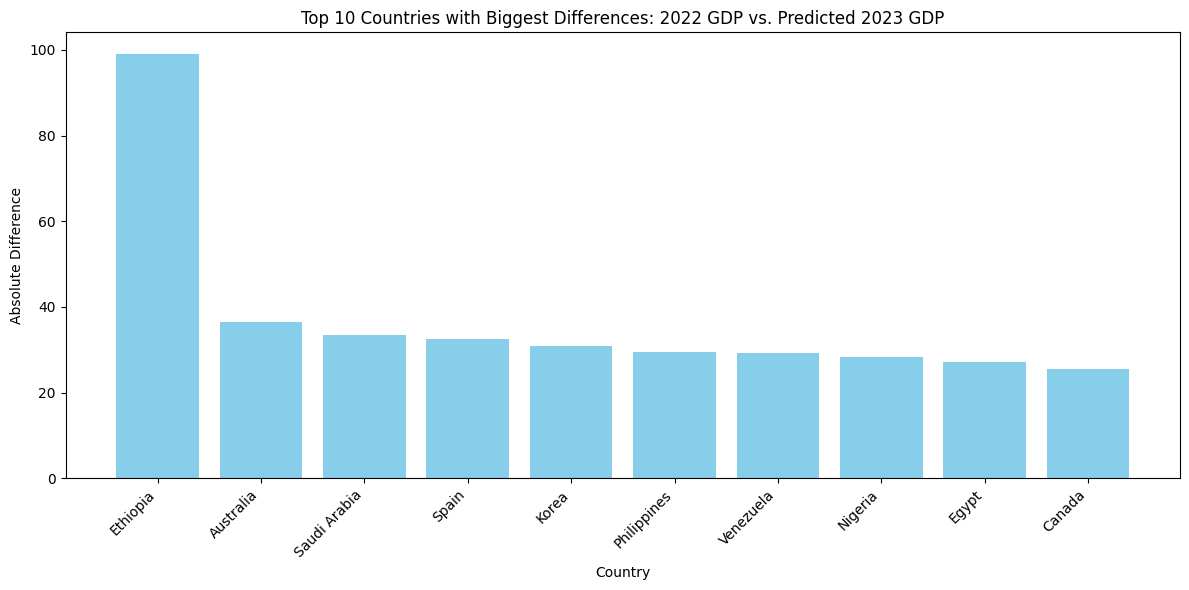

          Country     1999     2000     2001     2002     2003      2004      2005      2006      2007      2008      2009      2010      2012      2013      2014      2015      2016      2017      2018      2019      2020      2021      2022  Predicted 2023
54       Ethiopia    7.604    7.900    7.879    7.428    8.030     9.485    11.373    13.315    15.646    17.311    33.920    33.144    35.509    37.891    40.432    63.022    70.171    77.438    84.407    91.980   100.324    92.757     0.000       99.148585
7       Australia  401.782  390.017  368.191  412.901  527.588   639.356   712.436   754.816   822.089   854.072   920.010   982.826  1039.690  1078.910  1125.820  1240.800  1253.000  1317.160  1381.510  1442.470  1515.700  1610.560  1677.450     1713.997831
135  Saudi Arabia  161.172  188.693  183.257  188.803  214.859   250.673   309.945   348.604   354.924   377.193   379.500   442.765   514.836   556.532   601.387   632.073   643.234   694.517   749.201   799.750   848.557 

In [11]:
differences = abs(df2['2022'] - df2['Predicted 2023'])

country_diff = pd.concat([df2['Country'], differences], axis=1)
country_diff.columns = ['Country', 'Absolute Difference']




# Sort by absolute difference in descending order
sorted_country_diff = country_diff.sort_values(by='Absolute Difference', ascending=False)

# Plot the top 10 countries with the biggest differences
top_10_countries = sorted_country_diff.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Country'], top_10_countries['Absolute Difference'], color='skyblue')
plt.title('Top 10 Countries with Biggest Differences: 2022 GDP vs. Predicted 2023 GDP')
plt.xlabel('Country')
plt.ylabel('Absolute Difference')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the dataframe rows for the top 10 countries
print(df2.loc[top_10_countries.index].to_string(line_width=1000))

#### Another prediction - predict missing values

In [12]:
countries_to_predict = ["Yemen, Republic of", "Timor-Leste, Dem. Rep. of", "Syrian Arab Republic", "Pakistan", "Macedonia, Former Yugoslav Republic of", "Lao People's Democratic Republic", "Iran, Islamic Republic of", "Gambia, The", "Egypt", "Congo, Republic of", "Congo, Democratic Republic of", "Cape Verde", "Bahamas, The", "Afghanistan, Rep. of."]
print(df2[df2['Country'].isin(countries_to_predict)].to_string(line_width=1000))

                                    Country     1999    2000     2001     2002     2003     2004     2005     2006     2007     2008     2009     2010     2012     2013     2014     2015  2016  2017  2018  2019  2020     2021     2022  Predicted 2023
0                     Afghanistan, Rep. of.    0.000   0.000    0.000    4.084    4.585    5.971    7.309    8.399    9.892   11.513   13.318   15.406   19.248   21.555   24.304    0.000   0.0   0.0   0.0   0.0   0.0    0.000    0.000       -3.106514
10                             Bahamas, The    4.704   5.004    5.131    5.389    5.503    5.661    5.870    6.223    6.624    7.026    7.403    7.409    7.786    8.020    8.287    0.000   0.0   0.0   0.0   0.0   0.0    0.000    0.000       -2.272918
30                               Cape Verde    0.597   0.539    0.563    0.621    0.814    0.925    0.999    1.150    1.313    1.449    1.755    1.885    2.243    2.459    2.689    0.000   0.0   0.0   0.0   0.0   0.0    0.000    0.000       -2.096

In [13]:
X2 = df2.drop(columns=['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'Country', 'Predicted 2023'])
y2 = df2[['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

model_2015 = LinearRegression()
model_2015.fit(X2, y2)

X_2015 = df2[df2['Country'].isin(countries_to_predict)].drop(columns=['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'Country', 'Predicted 2023'])
predictions_2015 = model_2015.predict(X_2015)

predicted_df = pd.DataFrame(predictions_2015, columns=['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])


existing_gdp = df2[df2['Country'].isin(countries_to_predict)][['Country', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2012', '2013', '2014']].reset_index(drop=True)
predicted_df = pd.concat([existing_gdp, predicted_df], axis=1)
# Print the predicted GDP values
print(predicted_df.to_string(line_width=1000))

                                   Country     1999    2000     2001     2002     2003     2004     2005     2006     2007     2008     2009     2010     2012     2013     2014        2015        2016        2017        2018        2019        2020        2021        2022
0                    Afghanistan, Rep. of.    0.000   0.000    0.000    4.084    4.585    5.971    7.309    8.399    9.892   11.513   13.318   15.406   19.248   21.555   24.304   34.138150   35.695505   38.987422   42.592955   46.542717   51.162414   56.632138   59.673291
1                             Bahamas, The    4.704   5.004    5.131    5.389    5.503    5.661    5.870    6.223    6.624    7.026    7.403    7.409    7.786    8.020    8.287   18.015380   17.950449   18.625332   19.317052   19.682516   20.235007   29.816645   29.928047
2                               Cape Verde    0.597   0.539    0.563    0.621    0.814    0.925    0.999    1.150    1.313    1.449    1.755    1.885    2.243    2.459    2.689   12